# Treatment Effects

When talking about the [endogeneity](https://www.stata.com/meeting/spain16/slides/pinzon-spain16.pdf), economists are usually little bit stressed out. In fact, endogeneity is so pervasive and annoying that every forward step in this area will be celebrated and memorized.

Today, we will look into the **treatment effect perspective** of dealing with endogeneity.
- **Individual** treatment effect (ITE)
- **Average** treatment effect (ATE)
- **Average** treatment effect of treated (ATT)
- **Local** average treatment effect (LATE)
- **Marginal** treatment effect (MTE)

## Preparation of Capturing TEs

### Relationships of TEs

First, I will make this overall statement: **ITE** is adorable but could never be measured directly. **ATE(ATT)** is an population measurement of the treatment effect, which is sensitive and sometimes weak. Furthermore, we could look into different scales of subpopulation(cohort) and derive the treatment effect accordingly, which are **LATE** and **MTE**.

Here, we also give some math interpretation of the terms mentioned above. In Econometrics, we have a [**Potential Outcome Context**](https://matheusfacure.github.io/python-causality-handbook/01-Introduction-To-Causality.html)(*This is a wonderful book chapter for causal inference! Look through this page if you are not familiar with this context.*) , which defines the counterfactual in a mathematical approach.

### Constructing a 'Unknown' prediction problem

In a God's view, she sees all the possibilities(**Potential Outcomes**),

$$Y_{i} = \left \{\begin{array}{ll}
      Y_{0i}, \text{unit i without the treatment};\\
      Y_{1i}, \text{unit i with the treatment}.
    \end{array} \right.$$

she then knows the **Individual** treatment effect (ITE) easily as,

$$ {ITE}_{i} = Y_{1i} - Y_{0i}, \forall  i \in population $$

But for us humans(econometricians), we only observe the realized outcome of $Y_{i}$, either treated or untreated, while never both. Then, we could just construct **Average** treatment effect (ATE) as,

$$ATE = E[Y_{1i}-Y_{0i}]$$

or an even smaller scale(only caring about the treated) called **Average** treatment effect of treated (ATT) as, 

$$ATT = E[Y_{1i}-Y_{0i}| D_{i} = 1]$$

given that treatment notation as $D_{i} = \left \{\begin{array}{ll}
      1, \text{unit i is treated};\\
      0, \text{otherwise}.\end{array} \right.$. If we look in to the details, we could find the real barrier of this estimation method, the unknown of untreated potential outcome of the treated group.
      
$$ATT = E[Y_{1i}-Y_{0i}| D_{i} = 1] = \underbrace{E[Y_{1i}| D_{i} = 1]}_{E[Y_{i}| D_{i} = 1], observed} - \underbrace{E[Y_{0i}| D_{i} = 1]}_{unknown} $$

In this circumstance, we could say the ATE estimation problem is now reduced to a $E[Y_{0i}| D_{i} = 1]$ prediction problem. The better prediction we get of "unknown" part, the exacter estimation we will get on ATE.


## Solving the 'Unknown' prediction problem

In this section, we will look into some methods of predicting the **'Unknown'($E[Y_{0i}| D_{i} = 1]$)** in previous section. Some methods may seems silly at first glimpse, but this procedure shows the essence and **foundation** of the whole theories.

<figure>
<img src='https://149662705.v2.pressablecdn.com/wp-content/uploads/2020/12/21cf4a_830a45b8c4d04c5b9ffc674c905000f9_mv2_d_1676_1300_s_2.jpg' alt="" width=1300 height=1000 />
<figcaption align = "center"><b>Always...always pay enough attention to bias!</b></figcaption>
</figure>

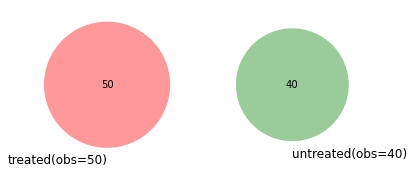

In [1]:
# import modules
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
%matplotlib inline

# depict venn diagram
venn2(subsets = (50, 40, 0), set_labels = ('treated(obs=50)', 'untreated(obs=40)'))
plt.show()

### Method1 Using Average Untreated Outcome and Bias

We may use a [Venn diagram](https://www.geeksforgeeks.org/how-to-create-and-customize-venn-diagrams-in-python/) to illustrate the story. First, we divide the population into two groups,'treated' and 'untreated'. Then, the God's view of data is like the table below.

| potential $Y_{?i}$   |       $D_{i}= 1 $       |       $D_{i} = 0$      |
|--------------|:-----------------------:|-----------------------:|
| treated      |  $E[Y_{1i}| D_{i} = 1]$ | $E[Y_{1i}| D_{i} = 0]$ |
| untreated    |  $E[Y_{0i}| D_{i} = 1]$ | $E[Y_{0i}| D_{i} = 0]$ |

What we(econometricians) actually observe is the table below, with 2 missing parts as blanks.

| REAL $Y_{i}$  |       $D_{i}= 1 $      |       $D_{i} = 0$     |
|--------------|:----------------------:|----------------------:|
| treated      |  $E[Y_{i}|D_{i} = 1]$  |                       |
| untreated    |                        | $E[Y_{i}|D_{i} = 0]$  |

Now, an intuitive way of predicting **'Unknown'($E[Y_{0i}| D_{i} = 1]$)** is using $E[Y_{i}|D_{i} = 0]$ instead, which is available in hand. In this way, we can separate the result into two parts.

$$\underbrace{E[Y_{i}|D_{i} = 1]-E[Y_{i}|D_{i} = 0]}_{direct-difference} = \underbrace{(E[Y_{i}|D_{i} = 1]-E[Y_{0i}|D_{i} = 1])}_{ATT} + \underbrace{(E[Y_{0i}|D_{i} = 1]-E[Y_{i}| D_{i} = 0])}_{Bias} $$

From the breakdown, we could see that ATT is properly estimated if and only if $Bias = 0$. This holds when $E[Y_{0i}|D_{i} = 1] = E[Y_{i}| D_{i} = 0]$, which indicates the pre-treatment mean of two groups are the same. In practice, this situation is mostly constructed by designing a [Randomised Controlled Trials (RCT)] (https://en.wikipedia.org/wiki/Randomized_controlled_trial). **The RCT magic ensures the direct-difference to be causal effect.**

<img src='https://emj.bmj.com/content/emermed/20/2/164/F1.medium.gif'>

The image is from a [study](https://emj.bmj.com/content/20/2/164) on RCT principles.

In [2]:
import ipystata
from ipystata.config import config_stata  
# https://github.com/TiesdeKok/ipystata/tree/master/#setupunix
# This shows how to find the "Stata executable" in a Unix(MacOS) system
config_stata("/Applications/Stata/StataSE.app/Contents/MacOS/StataSE", force_batch=True)  

IPyStata is loaded in batch mode.


In [3]:
%%stata

display "Hello, I am printed in Stata."  


Hello, I am printed in Stata.
